# **BƯỚC 1: TẢI DỮ LIỆU,ĐỌC DỮ LIỆU VÀ KHÁM PHÁ DỮ LIỆU**

Bước đầu tiên:Em sẽ import những thư viện hỗ trợ cho bài toán của mình.Như thư viện Pandas,Numpy,thư viện vẽ biểu đồ seaborn,matplotlib.Và 2 thư viện cuối cùng là hỗ trợ chia tập train và tập test.các thư viện hỗ trợ đánh giá

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Tiếp theo,Em sẽ load file đọc và tải dữ liệu lên.Để xem dữ liệu này có bao nhiêu cột,thống kê dữ liệu ra như thế nào.Sau khi đã in ra thì cũng có thể thấy rõ được đối với dữ liệu GCM gồm có 12 thuộc tính và dữ liệu thật thì có 2 thuộc tính

In [ ]:
# Tải tệp dữ liệu từ đường dẫn
data = pd.read_excel("average_data.xlsx")
data_real= pd.read_excel("/content/Precipitation.xlsx")
# Kiểm tra tên cột và xem dữ liệu
print(data.columns)  # Kiểm tra tên cột
print(data_real.columns)  # Kiểm tra tên cột



Index(['Date', 'hurs', 'huss', 'pr', 'prsn', 'ps', 'rlds', 'rsds', 'sfcwind',
       'tas', 'tasmax', 'tasmin'],
      dtype='object')
Index(['Unnamed: 0', 'Precipitation'], dtype='object')


In [ ]:

data_real.rename(columns={'Unnamed: 0': 'Date','Precipitation':'actual Precipitation'}, inplace=True)

data_real.head(10000)


,Date,actual Precipitation
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
...,...,...
9995,2007-05-14,52.7
9996,2007-05-15,1.7
9997,2007-05-16,0.0
9998,2007-05-17,0.2


In [ ]:
data_gcm_copy = data.copy()
data_gcm_copy

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,66.017814,0.015213,0.107736,0.0,100985.600000,401.298057,147.996867,2.557224,298.238114,303.323829,294.683429
1,1980-01-02,66.032787,0.015296,0.787894,0.0,100988.657143,400.149486,157.576691,2.074404,298.324414,303.069486,294.173186
2,1980-01-03,62.821351,0.014430,0.022647,0.0,101035.485714,393.220629,170.866522,2.442801,298.237643,303.493729,293.491271
3,1980-01-04,62.638889,0.014378,0.000000,0.0,101024.200000,390.311014,187.438010,2.961550,298.350400,303.666057,293.875929
4,1980-01-05,62.467191,0.014461,0.000000,0.0,100954.200000,392.005114,189.468775,2.100188,298.446629,303.641029,293.775029
...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,68.869741,0.017029,3.824927,0.0,100861.900000,411.296086,161.919056,1.952798,299.608957,304.026271,296.314957
12780,2014-12-28,67.972070,0.016709,1.200668,0.0,100886.557143,408.048357,158.351265,2.389934,299.434029,303.700629,296.052143
12781,2014-12-29,68.576631,0.017011,0.326678,0.0,100868.014286,403.970014,182.266582,2.067103,299.575400,304.221971,295.774757
12782,2014-12-30,69.951713,0.017599,0.475925,0.0,100872.514286,405.386400,190.132876,2.012729,299.718786,304.959571,296.142700


Bước kế tiếp,Để việc quan sát dữ liệu rõ ràng thì mình sẽ đổi tên cột unnamed thành cột Date.Và để đảm bảo được không thay đổi dữ liệu ban đầu thì mình sẽ dùng code coppy ra một bản mới

In [ ]:
data_real_copy = data_real.copy()
data_real_copy

,Date,actual Precipitation
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
...,...,...
12779,2014-12-27,0.0
12780,2014-12-28,0.0
12781,2014-12-29,0.0
12782,2014-12-30,0.0


In [ ]:
# Hiển thị dữ liệu
print(data_gcm_copy.head(10))


        Date       hurs      huss        pr  prsn             ps        rlds  \
0 1980-01-01  66.017814  0.015213  0.107736   0.0  100985.600000  401.298057   
1 1980-01-02  66.032787  0.015296  0.787894   0.0  100988.657143  400.149486   
2 1980-01-03  62.821351  0.014430  0.022647   0.0  101035.485714  393.220629   
3 1980-01-04  62.638889  0.014378  0.000000   0.0  101024.200000  390.311014   
4 1980-01-05  62.467191  0.014461  0.000000   0.0  100954.200000  392.005114   
5 1980-01-06  63.243533  0.014887  0.020494   0.0  100892.457143  393.233686   
6 1980-01-07  65.521517  0.015644  0.073847   0.0  100859.957143  400.371729   
7 1980-01-08  66.350053  0.015862  0.020335   0.0  100893.014286  401.933000   
8 1980-01-09  62.184587  0.015063  0.618192   0.0  100878.985714  400.408500   
9 1980-01-10  67.515341  0.015684  1.770106   0.0  100880.728571  397.954600   

         rsds   sfcwind         tas      tasmax      tasmin  
0  147.996867  2.557224  298.238114  303.323829  294.6834

In [ ]:
print(data_real_copy.head(100))

         Date  actual Precipitation
0  1980-01-01                   0.0
1  1980-01-02                   0.0
2  1980-01-03                   0.0
3  1980-01-04                   0.0
4  1980-01-05                   0.0
..        ...                   ...
95 1980-04-05                   0.0
96 1980-04-06                   0.0
97 1980-04-07                   0.0
98 1980-04-08                   0.0
99 1980-04-09                   0.0

[100 rows x 2 columns]


# **BƯỚC 2: TIỀN XỬ LÍ DỮ LIỆU**

In [ ]:
# Kiểm tra tên cột và xem dữ liệu
print(data_gcm_copy.columns)  # Kiểm tra tên cột
print(data_gcm_copy.head())  # Xem dữ liệu



Index(['Date', 'hurs', 'huss', 'pr', 'prsn', 'ps', 'rlds', 'rsds', 'sfcwind',
       'tas', 'tasmax', 'tasmin'],
      dtype='object')
        Date       hurs      huss        pr  prsn             ps        rlds  \
0 1980-01-01  66.017814  0.015213  0.107736   0.0  100985.600000  401.298057   
1 1980-01-02  66.032787  0.015296  0.787894   0.0  100988.657143  400.149486   
2 1980-01-03  62.821351  0.014430  0.022647   0.0  101035.485714  393.220629   
3 1980-01-04  62.638889  0.014378  0.000000   0.0  101024.200000  390.311014   
4 1980-01-05  62.467191  0.014461  0.000000   0.0  100954.200000  392.005114   

         rsds   sfcwind         tas      tasmax      tasmin  
0  147.996867  2.557224  298.238114  303.323829  294.683429  
1  157.576691  2.074404  298.324414  303.069486  294.173186  
2  170.866522  2.442801  298.237643  303.493729  293.491271  
3  187.438010  2.961550  298.350400  303.666057  293.875929  
4  189.468775  2.100188  298.446629  303.641029  293.775029  


In [ ]:
# Kiểm tra tên cột và xem dữ liệu
print(data_real_copy.columns)  # Kiểm tra tên cột
print(data_real_copy.head())  # Xem dữ liệu

Index(['Date', 'actual Precipitation'], dtype='object')
        Date  actual Precipitation
0 1980-01-01                   0.0
1 1980-01-02                   0.0
2 1980-01-03                   0.0
3 1980-01-04                   0.0
4 1980-01-05                   0.0


In [ ]:
data_gcm_copy.describe()

,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
count,12784.000000,12784.000000,12784.000000,1.278400e+04,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000,12784.000000
mean,75.707345,0.018707,4.674708,1.309972e-10,100716.527992,418.452891,181.476331,2.696141,300.649720,305.728843,297.404633
std,8.928263,0.001868,4.794362,9.491875e-10,150.938126,13.173785,25.592792,0.514850,1.032519,1.302451,1.320048
min,56.004664,0.013593,0.000000,0.000000e+00,100346.185714,377.880014,97.533713,1.260936,297.265957,302.158043,292.990543
25%,67.268035,0.017103,0.287857,0.000000e+00,100586.975000,407.940607,163.285430,2.318656,299.972868,304.808836,296.481429
50%,76.547971,0.019472,3.533504,0.000000e+00,100704.907143,423.816871,177.880242,2.683196,300.636521,305.470893,297.749836
75%,84.544625,0.020218,7.763029,0.000000e+00,100836.142857,428.854325,200.094135,3.049220,301.292768,306.507089,298.412550
max,89.795309,0.022163,49.092177,2.110216e-08,101162.785714,440.348014,247.041439,4.694439,303.507214,309.492329,300.106386


In [ ]:
data_real_copy.describe()

,actual Precipitation
count,12784.000000
mean,5.259089
std,12.754702
min,0.000000
25%,0.000000
50%,0.000000
75%,3.600000
max,162.200000


In [ ]:
data_gcm_copy.shape


(12784, 12)

In [ ]:
data_real_copy.shape

(12784, 2)

In [ ]:
data_gcm_copy.info

<bound method DataFrame.info of             Date       hurs      huss        pr  prsn             ps  \
0     1980-01-01  66.017814  0.015213  0.107736   0.0  100985.600000   
1     1980-01-02  66.032787  0.015296  0.787894   0.0  100988.657143   
2     1980-01-03  62.821351  0.014430  0.022647   0.0  101035.485714   
3     1980-01-04  62.638889  0.014378  0.000000   0.0  101024.200000   
4     1980-01-05  62.467191  0.014461  0.000000   0.0  100954.200000   
...          ...        ...       ...       ...   ...            ...   
12779 2014-12-27  68.869741  0.017029  3.824927   0.0  100861.900000   
12780 2014-12-28  67.972070  0.016709  1.200668   0.0  100886.557143   
12781 2014-12-29  68.576631  0.017011  0.326678   0.0  100868.014286   
12782 2014-12-30  69.951713  0.017599  0.475925   0.0  100872.514286   
12783 2014-12-31  69.668833  0.017325  0.472417   0.0  100932.342857   

             rlds        rsds   sfcwind         tas      tasmax      tasmin  
0      401.298057  147.99

In [ ]:
data_real_copy.info

<bound method DataFrame.info of             Date  actual Precipitation
0     1980-01-01                   0.0
1     1980-01-02                   0.0
2     1980-01-03                   0.0
3     1980-01-04                   0.0
4     1980-01-05                   0.0
...          ...                   ...
12779 2014-12-27                   0.0
12780 2014-12-28                   0.0
12781 2014-12-29                   0.0
12782 2014-12-30                   0.0
12783 2014-12-31                   0.0

[12784 rows x 2 columns]>

In [ ]:
data_gcm_copy.isnull().sum()

Date       0
hurs       0
huss       0
pr         0
prsn       0
ps         0
rlds       0
rsds       0
sfcwind    0
tas        0
tasmax     0
tasmin     0
dtype: int64

In [ ]:
data_real_copy.isnull().sum()

Date                    0
actual Precipitation    0
dtype: int64

In [ ]:
data_real_copy['Date'] = pd.to_datetime(data_real_copy['Date'])
data_gcm_copy['Date'] = pd.to_datetime(data_gcm_copy['Date'])

In [ ]:
# Merge GCM data into the new DataFrame based on date
merged_data = pd.merge(data_real_copy, data_gcm_copy, on='Date', how='left')
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,66.017814,0.015213,0.107736,0.0,100985.600000,401.298057,147.996867,2.557224,298.238114,303.323829,294.683429
1,1980-01-02,0.0,66.032787,0.015296,0.787894,0.0,100988.657143,400.149486,157.576691,2.074404,298.324414,303.069486,294.173186
2,1980-01-03,0.0,62.821351,0.014430,0.022647,0.0,101035.485714,393.220629,170.866522,2.442801,298.237643,303.493729,293.491271
3,1980-01-04,0.0,62.638889,0.014378,0.000000,0.0,101024.200000,390.311014,187.438010,2.961550,298.350400,303.666057,293.875929
4,1980-01-05,0.0,62.467191,0.014461,0.000000,0.0,100954.200000,392.005114,189.468775,2.100188,298.446629,303.641029,293.775029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,68.869741,0.017029,3.824927,0.0,100861.900000,411.296086,161.919056,1.952798,299.608957,304.026271,296.314957
12780,2014-12-28,0.0,67.972070,0.016709,1.200668,0.0,100886.557143,408.048357,158.351265,2.389934,299.434029,303.700629,296.052143
12781,2014-12-29,0.0,68.576631,0.017011,0.326678,0.0,100868.014286,403.970014,182.266582,2.067103,299.575400,304.221971,295.774757
12782,2014-12-30,0.0,69.951713,0.017599,0.475925,0.0,100872.514286,405.386400,190.132876,2.012729,299.718786,304.959571,296.142700


In [ ]:
merged_data = merged_data.set_index('Date')
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

merged_data = create_features(merged_data)

In [ ]:
merged_data

,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,66.017814,0.015213,0.107736,0.0,100985.600000,401.298057,147.996867,2.557224,298.238114,303.323829,294.683429,1,1,1980,1,1,1
1980-01-02,0.0,66.032787,0.015296,0.787894,0.0,100988.657143,400.149486,157.576691,2.074404,298.324414,303.069486,294.173186,1,1,1980,2,2,1
1980-01-03,0.0,62.821351,0.014430,0.022647,0.0,101035.485714,393.220629,170.866522,2.442801,298.237643,303.493729,293.491271,1,1,1980,3,3,1
1980-01-04,0.0,62.638889,0.014378,0.000000,0.0,101024.200000,390.311014,187.438010,2.961550,298.350400,303.666057,293.875929,1,1,1980,4,4,1
1980-01-05,0.0,62.467191,0.014461,0.000000,0.0,100954.200000,392.005114,189.468775,2.100188,298.446629,303.641029,293.775029,1,1,1980,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.0,68.869741,0.017029,3.824927,0.0,100861.900000,411.296086,161.919056,1.952798,299.608957,304.026271,296.314957,4,12,2014,361,27,52
2014-12-28,0.0,67.972070,0.016709,1.200668,0.0,100886.557143,408.048357,158.351265,2.389934,299.434029,303.700629,296.052143,4,12,2014,362,28,52
2014-12-29,0.0,68.576631,0.017011,0.326678,0.0,100868.014286,403.970014,182.266582,2.067103,299.575400,304.221971,295.774757,4,12,2014,363,29,1


In [ ]:
# Average precipitation by month and year
sumAcPrMonth = merged_data.groupby(['month', 'year'])['actual Precipitation'].mean().reset_index()
# Average hurs by month and year
avgGCMHursMonth = merged_data.groupby(['month', 'year'])['hurs'].mean().reset_index()
# Average huss by month and year
avgGCMHussMonth = merged_data.groupby(['month', 'year'])['huss'].mean().reset_index()
# Average GCM precipitation by month and year
sumGCMPrMonth = merged_data.groupby(['month', 'year'])['pr'].mean().reset_index()
# Average ps by month and year
avgGCMPsMonth = merged_data.groupby(['month', 'year'])['ps'].mean().reset_index()
# Average Prsn by month and year
avgPrsnMonth = merged_data.groupby(['month', 'year'])['prsn'].mean().reset_index()
# Average rlds by month and year
avgGCMRldsMonth = merged_data.groupby(['month', 'year'])['rlds'].mean().reset_index()
# Average rsds by month and year
avgGCMRsdsMonth = merged_data.groupby(['month', 'year'])['rsds'].mean().reset_index()
# Average sfcwind by month and year
avgGCMSfcwindMonth = merged_data.groupby(['month', 'year'])['sfcwind'].mean().reset_index()
# Average tas by month and year
avgGCMtasMonth = merged_data.groupby(['month', 'year'])['tas'].mean().reset_index()
# Average tasmax by month and year
avgGCMtasmaxMonth = merged_data.groupby(['month', 'year'])['tasmax'].mean().reset_index()
# Average tasmin by month and year
avgGCMtasminMonth = merged_data.groupby(['month', 'year'])['tasmin'].mean().reset_index()

In [ ]:
avgGCMtasminMonth

,month,year,tasmin
1980-01-01,1,1980,294.347212
1981-01-01,1,1981,294.442330
1982-01-01,1,1982,294.585143
1983-01-01,1,1983,294.526973
1984-01-01,1,1984,294.539151
...,...,...,...
2010-12-01,12,2010,296.309747
2011-12-01,12,2011,296.167255
2012-12-01,12,2012,296.751779
2013-12-01,12,2013,296.664012


In [ ]:
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumAcPrMonth.index = sumAcPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHursMonth.index = avgGCMHursMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHussMonth.index = avgGCMHussMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumGCMPrMonth.index = sumGCMPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRldsMonth.index = avgGCMRldsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMPsMonth.index = avgGCMPsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRsdsMonth.index = avgGCMRsdsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMSfcwindMonth.index = avgGCMSfcwindMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasMonth.index = avgGCMtasMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasmaxMonth.index = avgGCMtasmaxMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasminMonth.index = avgGCMtasminMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)

In [ ]:
sumAcPrMonth

,month,year,actual Precipitation
1980-01-1,1,1980,1.151613
1981-01-1,1,1981,0.119355
1982-01-1,1,1982,0.000000
1983-01-1,1,1983,0.006452
1984-01-1,1,1984,0.561290
...,...,...,...
2010-12-1,12,2010,1.251613
2011-12-1,12,2011,0.235484
2012-12-1,12,2012,0.819355
2013-12-1,12,2013,1.009677


In [ ]:
sumAcPrMonth.index = pd.to_datetime(sumAcPrMonth.index, format='%Y-%m-%d')
avgGCMHursMonth.index = pd.to_datetime(avgGCMHursMonth.index, format='%Y-%m-%d')
avgGCMHussMonth.index = pd.to_datetime(avgGCMHussMonth.index, format='%Y-%m-%d')
sumGCMPrMonth.index = pd.to_datetime(sumGCMPrMonth.index, format='%Y-%m-%d')
avgGCMRldsMonth.index = pd.to_datetime(avgGCMRldsMonth.index, format='%Y-%m-%d')
avgGCMPsMonth.index = pd.to_datetime(avgGCMPsMonth.index, format='%Y-%m-%d')
avgGCMRsdsMonth.index = pd.to_datetime(avgGCMRsdsMonth.index, format='%Y-%m-%d')
avgGCMSfcwindMonth.index = pd.to_datetime(avgGCMSfcwindMonth.index, format='%Y-%m-%d')
avgGCMtasMonth.index = pd.to_datetime(avgGCMtasMonth.index, format='%Y-%m-%d')
avgGCMtasmaxMonth.index = pd.to_datetime(avgGCMtasmaxMonth.index, format='%Y-%m-%d')
avgGCMtasminMonth.index = pd.to_datetime(avgGCMtasminMonth.index, format='%Y-%m-%d')

In [ ]:
# Tạo chuỗi thời gian từ tháng 1/1980 đến tháng 12/2014
dates = pd.date_range(start="1980-01-01", end="2014-12-01", freq='MS')

In [ ]:
df = pd.DataFrame(index=dates)
df['actual Precipitation'] = sumAcPrMonth.drop(['month','year'], axis = 1)
df['hurs'] = avgGCMHursMonth.drop(['month','year'], axis = 1)
df['huss'] = avgGCMHussMonth.drop(['month','year'], axis = 1)
df['pr'] = sumGCMPrMonth.drop(['month','year'], axis = 1)
df['ps'] = avgGCMPsMonth.drop(['month','year'], axis = 1)
df['rlds'] =avgGCMRldsMonth.drop(['month','year'], axis = 1)
df['rsds'] =avgGCMRsdsMonth.drop(['month','year'], axis = 1)
df['sfcwind'] =avgGCMSfcwindMonth.drop(['month','year'], axis = 1)
df['tas'] =avgGCMtasMonth.drop(['month','year'], axis = 1)
df['tasmax'] =avgGCMtasmaxMonth.drop(['month','year'], axis = 1)
df['tasmin'] =avgGCMtasminMonth.drop(['month','year'], axis = 1)

In [ ]:
df

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,64.407393,0.015106,0.263217,100878.697235,394.625820,180.872357,2.421758,298.598569,304.161045,294.347212
1980-02-01,0.065517,63.249810,0.015655,0.206995,100870.581773,395.341144,208.083501,2.924481,299.475234,305.591295,295.293762
1980-03-01,0.006452,66.788324,0.016957,1.429791,100777.388479,404.424880,219.877693,2.881947,300.460502,306.319946,296.680752
1980-04-01,0.086667,69.796669,0.018875,2.760652,100635.040000,420.231607,217.795939,2.866655,301.938525,307.866370,298.217182
1980-05-01,9.293548,80.016032,0.020125,8.819848,100591.319355,427.662986,190.288559,2.265878,301.240125,306.396296,298.295806
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,11.400000,84.892111,0.020526,5.690076,100620.209217,430.668599,181.345676,2.542009,301.428379,306.089475,298.703925
2014-09-01,11.403333,85.320686,0.020436,9.291850,100621.584143,431.909246,161.734941,2.726213,301.146261,305.668278,298.537771
2014-10-01,9.887097,82.806838,0.020126,7.160679,100694.329954,427.566562,156.350693,2.214162,300.812761,305.392343,297.889879
2014-11-01,6.073333,76.040186,0.019173,5.283527,100744.430000,423.093478,157.627537,2.423369,300.498926,304.779237,297.568773


In [ ]:
df.describe()

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,5.236412,75.642505,0.018695,4.654149,100717.214041,418.370458,181.619500,2.697991,300.647967,305.732552,297.398603
std,4.576216,8.677802,0.001803,3.673177,141.285655,12.653274,21.939317,0.332426,0.980176,1.209409,1.263387
min,0.000000,60.483884,0.014374,0.023660,100488.081905,389.334310,144.574534,1.990209,298.206835,303.415025,294.086446
25%,0.543038,66.943176,0.016997,0.772325,100583.953687,407.607190,164.896901,2.433918,299.974141,304.873684,296.540231
50%,4.917849,76.141676,0.019371,4.871922,100706.459270,423.635723,172.494116,2.671475,300.628141,305.451054,297.698722
75%,8.621774,84.417778,0.020206,8.104734,100831.281505,428.545626,201.787675,2.956252,301.244053,306.445782,298.375019
max,17.930000,87.132908,0.021418,12.988108,101021.655760,436.984018,231.995490,3.585198,302.822415,308.765639,299.677337


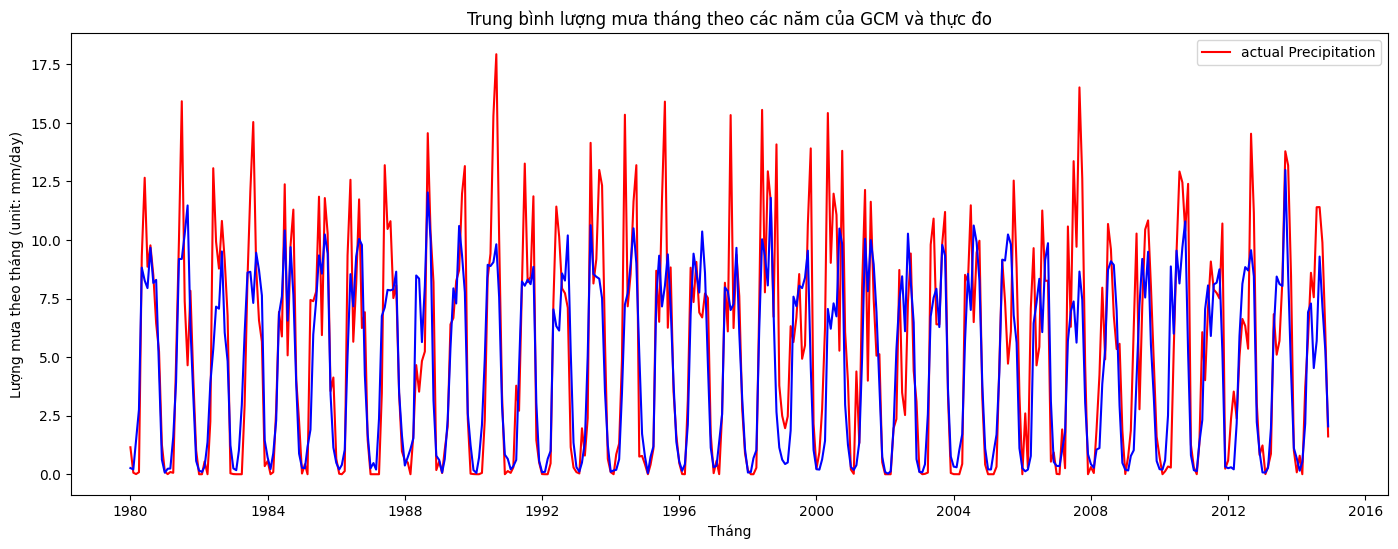

In [ ]:
# bar chart
plt.figure(figsize=(17, 6))
plt.plot(df.index, df['actual Precipitation'], color='red', label='actual Precipitation')
plt.plot(df.index, df['pr'], color='blue')
# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa theo tháng (unit: mm/day)')
# Đặt tiêu đề cho biểu đồ
plt.title('Trung bình lượng mưa tháng theo các năm của GCM và thực đo')
# Hiển thị biểu đồ
plt.legend()
plt.show()

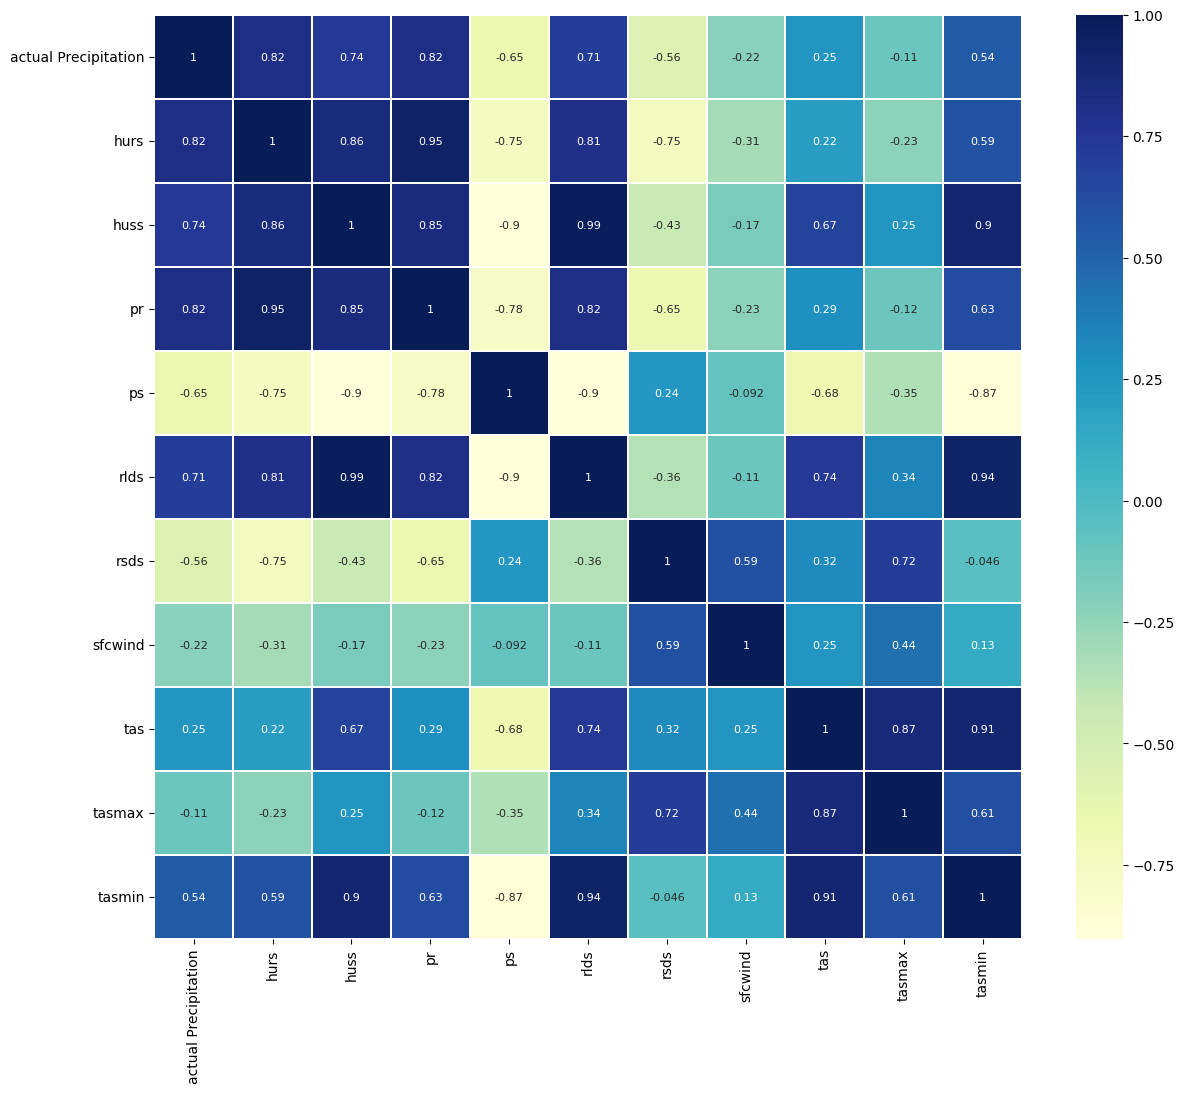

In [ ]:
import seaborn as sns
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
plt.show()

CHIA TRAIN VÀ TEST

In [ ]:
start_date = dt.datetime(2010, 1, 1)
df.index = pd.to_datetime(df.index)
train_set = df[df.index < start_date]
test_set = df[df.index >= start_date]

In [ ]:
train_set

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,64.407393,0.015106,0.263217,100878.697235,394.625820,180.872357,2.421758,298.598569,304.161045,294.347212
1980-02-01,0.065517,63.249810,0.015655,0.206995,100870.581773,395.341144,208.083501,2.924481,299.475234,305.591295,295.293762
1980-03-01,0.006452,66.788324,0.016957,1.429791,100777.388479,404.424880,219.877693,2.881947,300.460502,306.319946,296.680752
1980-04-01,0.086667,69.796669,0.018875,2.760652,100635.040000,420.231607,217.795939,2.866655,301.938525,307.866370,298.217182
1980-05-01,9.293548,80.016032,0.020125,8.819848,100591.319355,427.662986,190.288559,2.265878,301.240125,306.396296,298.295806
...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,10.448387,85.704390,0.020599,7.542502,100565.109217,431.367335,165.981360,3.425381,301.192252,305.538576,298.770411
2009-09-01,10.836667,86.602253,0.020412,9.497791,100663.381429,431.483397,155.617401,2.592438,300.849029,305.494863,298.259093
2009-10-01,8.032258,83.634678,0.019771,5.532455,100825.508756,424.497018,169.439900,2.545824,300.597625,305.449875,297.603624
2009-11-01,4.706667,75.952988,0.019137,3.258935,100812.791429,418.180820,167.390777,2.315003,300.552578,305.118999,297.400638


In [ ]:
test_set

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
2010-01-01,0.741935,64.446058,0.015564,0.215871,100967.853917,399.306576,182.263993,2.574989,299.590209,305.231280,295.348882
2010-02-01,0.000000,61.990783,0.016026,0.195798,100896.930102,401.646518,210.611948,2.949568,300.510807,306.588699,296.323996
2010-03-01,0.125806,61.366857,0.017209,0.591225,100840.774194,413.586166,219.770158,3.394922,301.797994,307.892458,298.056556
2010-04-01,0.330000,66.890589,0.019766,2.508514,100686.564762,428.946865,212.956876,2.817615,302.819395,308.690065,299.096380
2010-05-01,0.283871,78.578430,0.021418,8.871795,100552.398157,436.984018,177.241862,2.517123,302.734986,307.822936,299.677337
2010-06-01,5.333333,82.438390,0.021011,6.000249,100536.155714,433.010716,171.392121,2.819858,301.754350,306.613366,298.992574
2010-07-01,9.493548,85.135380,0.020725,9.545441,100524.505069,430.115795,166.869552,2.948844,301.276595,305.774834,298.634028
2010-08-01,12.922581,84.787476,0.020781,8.143760,100578.825806,431.010811,174.960758,3.033568,301.379542,305.947027,298.996210
2010-09-01,12.456667,85.842418,0.020499,9.684084,100649.417143,430.465300,161.656923,2.722149,301.070185,305.678422,298.388053
2010-10-01,10.380645,83.687771,0.020511,10.793542,100653.976498,429.635668,153.564673,2.037691,301.025245,305.397856,298.176678


In [ ]:
X_train = train_set.drop('actual Precipitation', axis = 1)
X_test = test_set.drop('actual Precipitation', axis = 1)
y_train = train_set['actual Precipitation']
y_test = test_set['actual Precipitation']

# **# Hàm đánh giá mô hình**

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
def NSE(y_test, y_pred):
  return 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
nse_scorer = make_scorer(NSE)

In [ ]:
# Hàm RMSE custom
def RMSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)
rmse_scorer = make_scorer(RMSE)

In [ ]:
def  MAE(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)
mae_scorer = make_scorer(MAE)

# **THUẬT TOÁN XGBOOTS VỚI THAM SỐ MẶT ĐỊNH**

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split,KFold

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

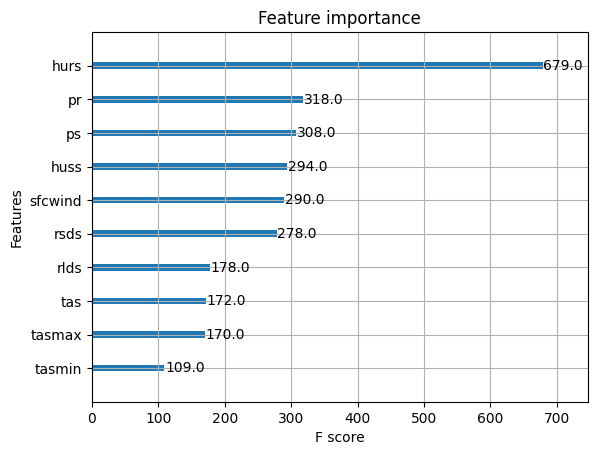

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 0.010500743171835593
Root mean squared Error: 0.014418127053308145
NSE: 0.9999901661199005


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.1341106944457398
Root mean squared Error: 2.855824080496987
NSE: 0.579412933434595


# **TINH CHỈNH MÔ HÌNH SỬ DỤNG GRIDSEARCH CV**

**sử dụng Grid Search SV**

In [ ]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

In [ ]:
n_estimators = [50,100,150, 200]
max_depth = [1,3,5,7]
learning_rate = [0.001, 0.01, 0.1, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1,0.5]
gamma = [0.01, 0.1,0.3, 0.5,1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

**tỉnh chỉnh mô hình**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the XGBRegressor
model = xgb.XGBRegressor(objective='reg:tweedie')

# Create a parameter grid
param_grid_xgb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate,
    'gamma': gamma
}

#Đây là tạo một GridSearchCV object để tìm kiếm tập tham số tốt nhất cho mô hình.
#n_job=-1 : dùng CPU, cv=kfold: Sử dụng phương thức cross-validation cho k fold, verbose=1: In kết quả tối ưu hóa trong quá trình thực thi.
grid_search = GridSearchCV(xgb_model,
                           param_grid_xgb,
                           scoring = rmse_scorer,
                           cv=kfold,
                           verbose=1,
                           error_score='raise',
                          )
grid_result = grid_search.fit(X,y)

Fitting 10 folds for each of 2240 candidates, totalling 22400 fits


In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.532045697061835
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.430949 (0.311594) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.001}
4.430942 (0.311582) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.01}
4.431008 (0.311580) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.1}
4.431294 (0.311583) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5}
4.299485 (0.313719) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.001}
4.299497 (0.313718) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.01}
4.299605 (0.313701) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.1}
4.300139 (0.313683) with: {'gamma': 0.01, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 0.5}
4.176642 (0.315681) wi

# **Kiểm tra kết quả lại với tham số tốt nhất**

In [ ]:
# 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 0.5

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:tweedie', gamma= 0.01, learning_rate = 0.1, max_depth = 1, n_estimators = 50, reg_lambda = 0.5)#max_depth=2, n_estimators=50
xgb_model.fit(X_train,
              y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:tweedie', ...)

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.7333701144723572
Root mean squared Error Train: 2.4400032829775142
NSE Train: 0.7183640867845671


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 1.9350098381579488
Root mean squared Error: 2.5785803543017853
NSE: 0.6571103706576111


**Sử dụng crossvalidation để đánh giá hiệu suất**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(xgb_model,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

RMSE of each fold:
[2.15490682 2.63026186 2.75605757 2.91754027 2.34896805 1.91807129
 2.88369149 2.84096509 2.36935796 2.7156022 ]
mean RMSE of Fold: 2.553542257632416

MAE of each fold:
[1.61331749 2.04386177 2.05274092 2.03098857 1.70811806 1.52370702
 2.06702661 1.82468667 1.7551759  2.10407224]
mean MAE of Fold: 1.8723695244196983

NSE of each fold:
[0.72722134 0.66956859 0.67449786 0.68103289 0.71628829 0.78390932
 0.5921901  0.62682336 0.72307101 0.58977457]
mean NSE of Fold: 0.6784377340354133


**in ra thuộc tính quan trọng**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

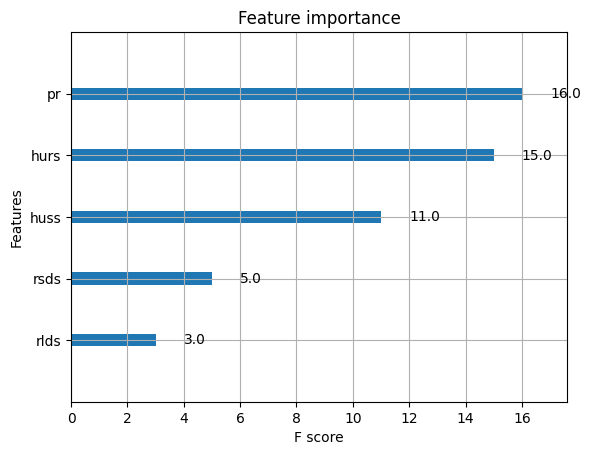

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

**Vẽ lại biểu đồ xem xét**

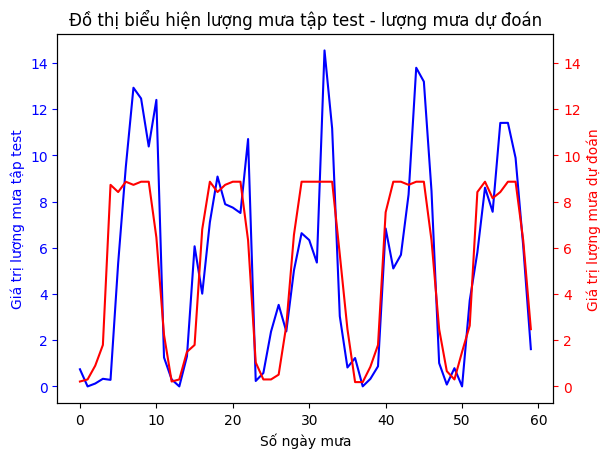

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


# **Thuật toán LIGHTGBM**

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split,KFold

In [ ]:

model_LightGBM = lgb.LGBMRegressor()
model_LightGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 5.217192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

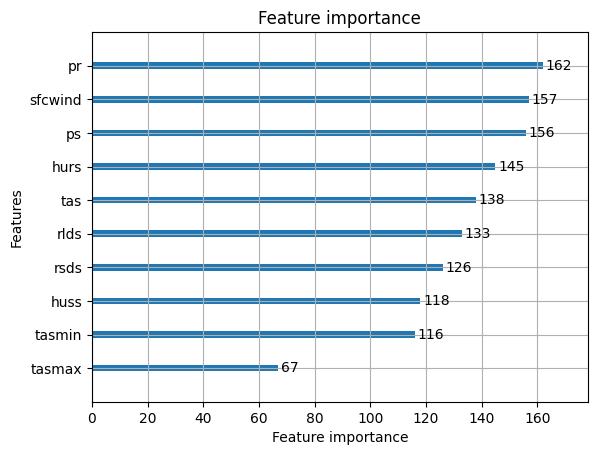

In [ ]:
model_LightGBM.get_params()
lgb.plot_importance(model_LightGBM)

In [ ]:
y_pred_train_lightgbm = model_LightGBM.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lightgbm))
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
nse = NSE(y_train, y_pred_train_lightgbm)
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(nse))

Root mean squared error train: 1.129095
Mean Abosolute error train: 0.796793
NSE train: 0.939693


In [ ]:
y_pred_test_lightgbm = model_LightGBM.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lightgbm))
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
nse = NSE(y_test, y_pred_test_lightgbm)
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(nse))

Root mean squared error test: 3.007831
Mean Abosolute error test: 2.170824
NSE test: 0.533448


**SỬ DỤNG GRIDSEARCH CV**

In [ ]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

In [ ]:
# Define the hyperparameters you want to search over
n_estimators = [50,90,100,150, 200]
max_depth = [2, 4, 6, 8,10]
learning_rate = [0.001, 0.01, 0.1, 0.5, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1, 0.3, 0.5]
gamma = [0.01, 0.1, 0.2, 0.5, 1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

# **TINH CHỈNH THAM SỐ**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': 'True',
    'boosting_type':'dart'
}
model_LightGBM = lgb.LGBMRegressor(**params)

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model_LightGBM,
    param_grid=param_grid,
    cv=kfold,
    scoring=rmse_scorer,
    error_score='raise'
)
grid_result=grid_search.fit(X,y)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.5982043674584783
Best Parameters: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.3}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.577563 (0.387897) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.001}
4.577567 (0.387897) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.01}
4.577609 (0.387892) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.1}
4.577690 (0.387896) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.3}
4.577815 (0.387910) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.5}
5.040784 (0.482985) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.001}
5.040787 (0.482984) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.01}
5.040806 (0.482990) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.1}
5.040840 (0.483008) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 90, 'reg_lambda': 0.3}
5.040901 (0.483018) with: {'learning_rat

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': True,
    'boosting_type': 'dart',
    'n_estimators': 200,
    'max_depth': 2,
    'learning_rate': 0.1,
    'reg_lambda': 0.3
}

model_train_lightgbm = lgb.LGBMRegressor(**params)

# Fit the model with early stopping
model_train_lightgbm.fit(
    X_train,
    y_train
)

[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959


LGBMRegressor(boosting_type='dart', force_row_wise=True, max_depth=2,
              metric='mean_squared_error', n_estimators=200,
              objective='tweedie', reg_lambda=0.3)

In [ ]:
y_pred_train = model_train_lightgbm.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.6227427332722024
Root mean squared Error Train: 2.3636913107186652
NSE Train: 0.7357051323166619


In [ ]:
y_pred_test = model_train_lightgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 1.960235318780179
Root mean squared Error: 2.66543165521081
NSE: 0.633623074896984


In [ ]:
# Đánh giá độ chính xác
mae = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.656058
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.623759
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.655677
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.650621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.649018
[LightGBM] [Info] Total Bins 1270
[

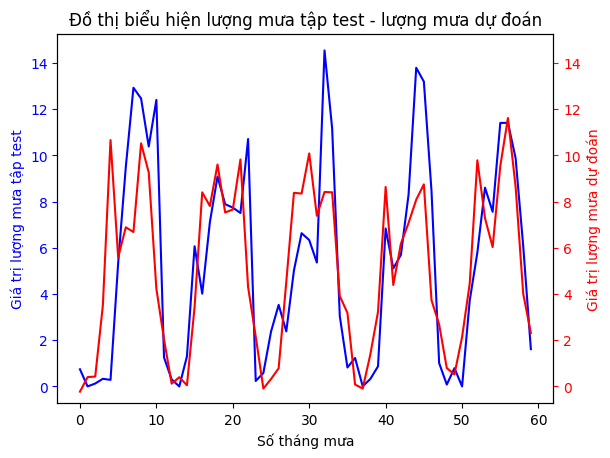

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số tháng mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test_lightgbm

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

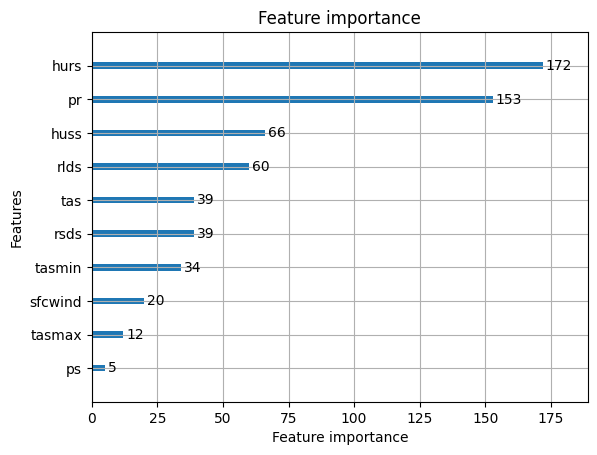

In [ ]:
model_train_lightgbm.get_params()
lgb.plot_importance(model_train_lightgbm)